# Working with Pandas

Okay, now we're officially working with pandas. Let's start with a quick recap of what we did from last class.

<span style="color: red">You might need to change this!</span> Set up your global variables correctly

In [1]:
DEMOGRAPHICS_FILE = "../classwork/data/neu/demographics.csv"
ADMISSIONS_FILE = "../classwork/data/neu/admission_rate.csv"
TUITION_FILE = "../classwork/data/neu/tuition.csv"

## From last class... reading the admission data into a dataframe.

In [2]:
import pandas as pd
data = pd.read_csv(ADMISSIONS_FILE)

# drop the columns we don't care about
data = data.drop("Admission Rate (Men)", axis=1)
data = data.drop("Admission Rate (Women)", axis=1)
data

,Year,Admission Rate (Total)
0,2013,32.31
1,2014,32.22
2,2015,28.48
3,2016,28.88
4,2017,27.44
5,2018,19.34
6,2019,18.05
7,2020,20.48
8,2021,18.00


In [3]:
data3 = pd.read_csv(TUITION_FILE)
data3 = data3.drop('Living On Campus', axis=1)
data3 = data3.drop('Student Preference', axis=1)
data3["Living Off Campus"] = data3["Living Off Campus"].str.replace('$', '').str.replace(',', '')
data3

,Year,Living Off Campus
0,2013,58096
1,2014,60290
2,2015,62800
3,2016,65503
4,2017,68177
5,2018,71202
6,2019,73236
7,2020,75732
8,2021,78202


In [4]:
data.head(5)

,Year,Admission Rate (Total)
0,2013,32.31
1,2014,32.22
2,2015,28.48
3,2016,28.88
4,2017,27.44


## Reading the demographics data into a dataframe..

In [5]:
data2 = pd.read_csv(DEMOGRAPHICS_FILE)
data2

,Year,American Indian or Native American,Asian,Black,Hispanic,Native Hawaiian or Other Pacific Islander,White,Two or More Races
0,2013,15,"1,600",632,"1,066",3,"8,831",534
1,2014,10,"1,753",624,"1,103",7,"8,828",597
2,2015,13,"1,903",646,"1,116",5,"8,568",595
3,2016,13,"1,994",660,"1,160",4,"8,218",647
4,2017,9,"2,163",644,"1,296",2,"8,397",668
5,2018,8,"2,279",712,"1,402",4,"8,271",705
6,2019,9,"2,452",750,"1,501",5,"8,367",796
7,2020,8,"3,103",834,"1,670",1,"8,961",948
8,2021,12,"3,713","1,236","2,180",3,"9,705","1,132"


Viewing data
- Describe
- Viewing a few entries
- Viewing data types
- Viewing row and column names

In [6]:
# code to explore the dataframe

Accessing data in the data frame.
- Rows and columns
- Using .loc
- Slicing
- Specifying multiple columns
- Boolean logic to filter data
- Using .iloc

In [7]:
selection = data2.loc[data2["Native Hawaiian or Other Pacific Islander"] > 2]
selection.iloc[2:5].Year

2    2015
3    2016
5    2018
Name: Year, dtype: int64

In [8]:
data2.Hispanic

0    1,066
1    1,103
2    1,116
3    1,160
4    1,296
5    1,402
6    1,501
7    1,670
8    2,180
Name: Hispanic, dtype: object

Cleaning our data-- do we need to do any cleaning?

In [9]:
# code to clean the data
columns = list(data2.columns)
for col in columns:
    if data2[col].dtypes == object:
        data2[col] = data2[col].str.replace(',', '').astype(int)

data2

,Year,American Indian or Native American,Asian,Black,Hispanic,Native Hawaiian or Other Pacific Islander,White,Two or More Races
0,2013,15,1600,632,1066,3,8831,534
1,2014,10,1753,624,1103,7,8828,597
2,2015,13,1903,646,1116,5,8568,595
3,2016,13,1994,660,1160,4,8218,647
4,2017,9,2163,644,1296,2,8397,668
5,2018,8,2279,712,1402,4,8271,705
6,2019,9,2452,750,1501,5,8367,796
7,2020,8,3103,834,1670,1,8961,948
8,2021,12,3713,1236,2180,3,9705,1132


In [10]:
# code to clean the data
columns = list(data3.columns)
for col in columns:
    if data3[col].dtypes == object:
        data3[col] = data3[col].str.replace(',', '').astype(int)

data3

,Year,Living Off Campus
0,2013,58096
1,2014,60290
2,2015,62800
3,2016,65503
4,2017,68177
5,2018,71202
6,2019,73236
7,2020,75732
8,2021,78202


## Merging the dataframes together.

In [11]:
# code to merge the dataframe

data = data.merge(data2, on="Year").merge(data3, on="Year")
data.index = data['Year']
data = data.drop('Year', axis=1)
data

,Admission Rate (Total),American Indian or Native American,Asian,Black,Hispanic,Native Hawaiian or Other Pacific Islander,White,Two or More Races,Living Off Campus
Year,,,,,,,,,
2013,32.31,15,1600,632,1066,3,8831,534,58096
2014,32.22,10,1753,624,1103,7,8828,597,60290
2015,28.48,13,1903,646,1116,5,8568,595,62800
2016,28.88,13,1994,660,1160,4,8218,647,65503
2017,27.44,9,2163,644,1296,2,8397,668,68177
2018,19.34,8,2279,712,1402,4,8271,705,71202
2019,18.05,9,2452,750,1501,5,8367,796,73236
2020,20.48,8,3103,834,1670,1,8961,948,75732
2021,18.00,12,3713,1236,2180,3,9705,1132,78202


## Plotting with pandas
Plotting with pandas is fun and easy. Let's try to recreate some plots from last week-- can we plot time series data?

,Admission Rate (Total),American Indian or Native American,Asian,Black,Hispanic,Native Hawaiian or Other Pacific Islander,White,Two or More Races,Living Off Campus
Year,,,,,,,,,
2013,32.31,15,1600,632,1066,3,8831,534,58096
2014,32.22,10,1753,624,1103,7,8828,597,60290
2015,28.48,13,1903,646,1116,5,8568,595,62800
2016,28.88,13,1994,660,1160,4,8218,647,65503
2017,27.44,9,2163,644,1296,2,8397,668,68177
2018,19.34,8,2279,712,1402,4,8271,705,71202
2019,18.05,9,2452,750,1501,5,8367,796,73236
2020,20.48,8,3103,834,1670,1,8961,948,75732
2021,18.00,12,3713,1236,2180,3,9705,1132,78202


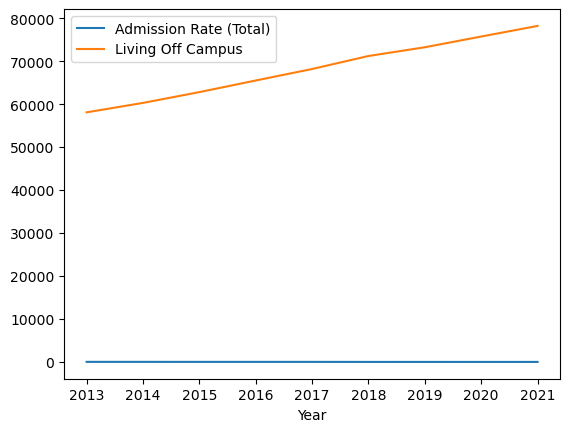

In [14]:
data[["Admission Rate (Total)", "Living Off Campus"]].plot()
data

In [ ]:
# Normalize data


# NumPy Test

In [23]:
ones_arr = np.ones(10)
array = np.arange(10)
array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
import numpy as np
import time

# Creating a large list and a NumPy array
size = 10**6
list_data = range(size)
numpy_data = np.arange(size)

# Time for list operation
start_time = time.time()
list_result = [x * 2 for x in list_data]
list_time = time.time() - start_time

# Time for NumPy operation
start_time = time.time()
numpy_result = numpy_data * 2
numpy_time = time.time() - start_time

print("List time:", list_time)
print("NumPy time:", numpy_time)
print("NumPy is faster by a factor of:", list_time / numpy_time)

List time: 0.058461904525756836
NumPy time: 0.002954244613647461
NumPy is faster by a factor of: 19.789121136308612
